In [1]:
%matplotlib inline


Group analysis of resting-state fMRI with ICA: CanICA
=====================================================

An example applying CanICA to resting-state data. This example applies it
to 30 subjects of the ADHD200 datasets. Then it plots a map with all the
components together and an axial cut for each of the components separately.

CanICA is an ICA method for group-level analysis of fMRI data. Compared
to other strategies, it brings a well-controlled group model, as well as a
thresholding algorithm controlling for specificity and sensitivity with
an explicit model of the signal. The reference papers are:

    * G. Varoquaux et al. "A group model for stable multi-subject ICA on
      fMRI datasets", NeuroImage Vol 51 (2010), p. 288-299

    * G. Varoquaux et al. "ICA-based sparse features recovery from fMRI
      datasets", IEEE ISBI 2010, p. 1177

Pre-prints for both papers are available on hal
(http://hal.archives-ouvertes.fr)

<div class="alert alert-info"><h4>Note</h4><p>The use of the attribute `components_img_` from decomposition
    estimators is implemented from version 0.4.1.
    For older versions, unmask the deprecated attribute `components_`
    to get the components image using attribute `masker_` embedded in
    estimator.
    See the `section Inverse transform: unmasking data <unmasking_step>`.</p></div>



First we load the HCP data
-------------------------------



In [2]:
import os

func_filenames='/home/share/TmpData/Qinglin/HCP/100206/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz'
print func_filenames

T1='/srv1/bin/fMRI-Toolbox/templates/MNI152_4mm_brain_mask.nii'

/home/share/TmpData/Qinglin/HCP/100206/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz


Here we apply CanICA on the data
---------------------------------



In [3]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=5, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
data=canica.prepare_data(func_filenames)
print(data.shape)
canica._raw_fit(data)
# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [/home/share/TmpData/Qinglin/HCP/100206/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz]
[MultiNiftiMasker.fit] Computing mask


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   43.2s finished


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/share/TmpData/Qinglin/HCP/100206/MNINonLinear/Results/tfMRI_MOTOR_LR/tfMRI_MOTOR_LR.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
(5, 215176)
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.001436, ...,  0.002709],
       ...,
       [ 0.001221, ..., -0.001642]], dtype=float32), n_iter=3, random_state=0, transpose=True, n_components=5)
___________________________________________________randomized_svd - 0.3s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.00152

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python2.7/dist-packages/sklearn/decomposition/fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   19.3s remaining:    0.0s


_________________________________________________________fastica - 19.3s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=398764591, whiten=True)
_________________________________________________________fastica - 19.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=924231285, whiten=True)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   38.3s remaining:    0.0s


_________________________________________________________fastica - 18.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=1478610112, whiten=True)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   57.0s remaining:    0.0s


_________________________________________________________fastica - 18.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=441365315, whiten=True)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.3min remaining:    0.0s


_________________________________________________________fastica - 18.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=1537364731, whiten=True)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min remaining:    0.0s


_________________________________________________________fastica - 18.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=192771779, whiten=True)


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.9min remaining:    0.0s


_________________________________________________________fastica - 18.5s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=1491434855, whiten=True)


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.2min remaining:    0.0s


_________________________________________________________fastica - 18.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=1819583497, whiten=True)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  2.5min remaining:    0.0s


_________________________________________________________fastica - 18.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.001525, ...,  0.002905],
       ...,
       [ 0.001138, ..., -0.001803]]), fun='cube', random_state=530702035, whiten=True)


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.8min remaining:    0.0s


_________________________________________________________fastica - 19.1s, 0.3min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.1min finished
/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


To visualize we plot the outline of all components on one figure
-----------------------------------------------------------------



In [4]:
components_img

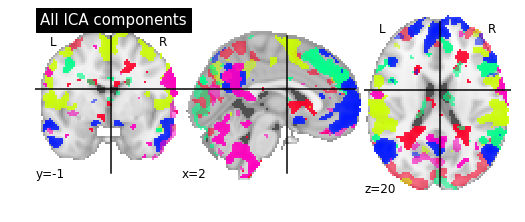

In [5]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(components_img, title='All ICA components')

/home/uga_qinglin/Documents/nilearn-deep/nilearn/_utils/param_validation.py:69: UserWarning: The given float value must not exceed 0.00759141333401. But, you have given threshold=0.01 
  threshold))
/home/uga_qinglin/Documents/nilearn-deep/nilearn/plotting/displays.py:680: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))
/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')
/home/uga_qinglin/Documents/nilearn-deep/nilearn/_utils/param_validation.py:69: UserWarning: The given float value must not exceed 0.00943892914802. But, you have given threshold=0.01 
  threshold))
/home/uga_qinglin/Documents/nilearn-deep/nilearn/_utils/param_validation.py:69: UserWarning: The given 

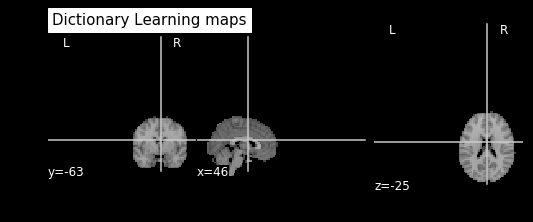

In [6]:

from nilearn import plotting
T1='/srv1/bin/fMRI-Toolbox/templates/MNI152_444.nii.gz'
plotting.plot_prob_atlas(components_img, bg_img=T1,threshold=0.01, view_type='filled_contours',
                         title='Dictionary Learning maps')


Finally, we plot the map for each ICA component separately
-----------------------------------------------------------



/home/uga_qinglin/Documents/nilearn-deep/nilearn/plotting/find_cuts.py:285: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  data[slices] *= 1.e-3
/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


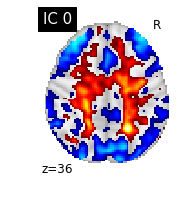

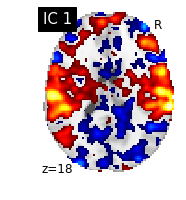

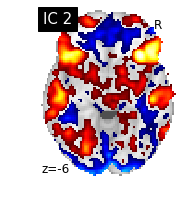

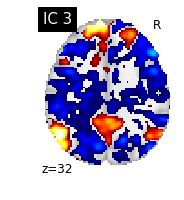

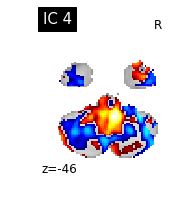

In [7]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

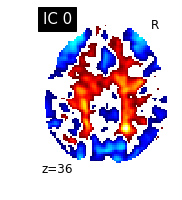

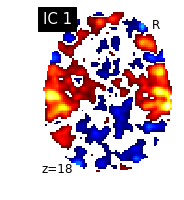

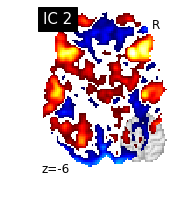

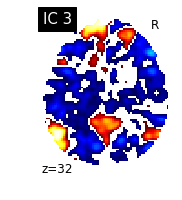

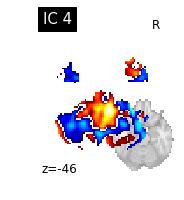

In [8]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(components_img)):
    plot_stat_map(cur_img, bg_img=T1, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False, black_bg=False)
    show()


In [9]:
from nilearn.image import load_img
from nilearn.datasets import load_mni152_template
template = load_mni152_template()
template_img = load_img(template)

from nilearn.image import resample_to_img
resampled_stat_img = resample_to_img(components_img, template)

In [10]:
original_shape = components_img.shape
original_affine = components_img.affine
resampled_shape = resampled_stat_img.shape
resampled_affine = resampled_stat_img.affine
template_shape = template_img.shape
template_affine = template_img.affine
print("""Shape comparison:
- Original t-map image shape : {0}
- Resampled t-map image shape: {1}
- Template image shape       : {2}
""".format(original_shape, resampled_shape, template_shape))

print("""Affine comparison:
- Original t-map image affine :\n {0}
- Resampled t-map image affine:\n {1}
- Template image affine       :\n {2}
""".format(original_affine, resampled_affine, template_affine))

Shape comparison:
- Original t-map image shape : (91, 109, 91, 5)
- Resampled t-map image shape: (91, 109, 91, 5)
- Template image shape       : (91, 109, 91)

Affine comparison:
- Original t-map image affine :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]



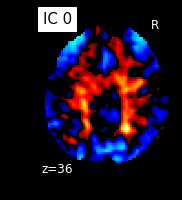

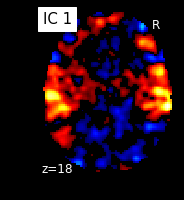

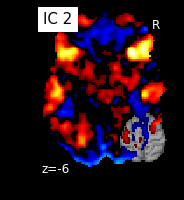

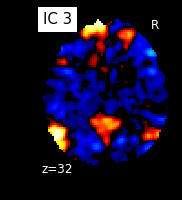

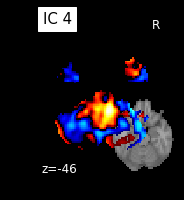

In [11]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(resampled_stat_img)):
    plot_stat_map(cur_img, bg_img=T1,display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)

show()

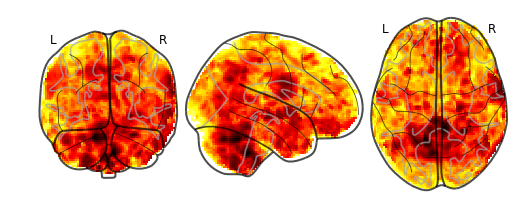

In [12]:
cur_img
from nilearn import plotting
plotting.plot_glass_brain(cur_img)

In [13]:
from nilearn import datasets

adhd_dataset = datasets.fetch_abide_pcp(n_subjects=1)
adhd_dataset.func_preproc

/usr/local/lib/python2.7/dist-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


[u'/home/uga_qinglin/nilearn_data/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050003_func_preproc.nii.gz']

In [14]:
#raw = load_img('/home/share/TmpData/yu/trace_Autism_new/AUTISM_DATA/ABIDE_II/ABIDEII-BNI_1/29006/session_1/rest_1/rest.nii.gz')
from nilearn import datasets

adhd_dataset = datasets.fetch_abide_pcp(n_subjects=1)
func_filenames = adhd_dataset.func_preproc  # list of 4D nifti files for each subject
raw = load_img(func_filenames)
from nilearn.image import resample_to_img
resampled_stat_img = resample_to_img(func_filenames, template)

original_shape = raw.shape
original_affine = raw.affine
resampled_shape = resampled_stat_img.shape
resampled_affine = resampled_stat_img.affine
template_shape = template_img.shape
template_affine = template_img.affine
print("""Shape comparison:
- Original t-map image shape : {0}
- Resampled t-map image shape: {1}
- Template image shape       : {2}
""".format(original_shape, resampled_shape, template_shape))

print("""Affine comparison:
- Original t-map image affine :\n {0}
- Resampled t-map image affine:\n {1}
- Template image affine       :\n {2}
""".format(original_affine, resampled_affine, template_affine))

Shape comparison:
- Original t-map image shape : (61, 73, 61, 196)
- Resampled t-map image shape: (91, 109, 91, 196)
- Template image shape       : (91, 109, 91)

Affine comparison:
- Original t-map image affine :
 [[  -3.   -0.    0.   90.]
 [  -0.    3.   -0. -126.]
 [   0.    0.    3.  -72.]
 [   0.    0.    0.    1.]]
- Resampled t-map image affine:
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
- Template image affine       :
 [[  -2.    0.    0.   90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]



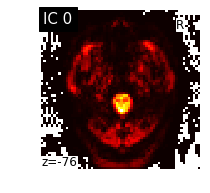

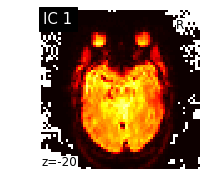

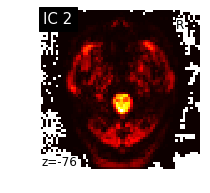

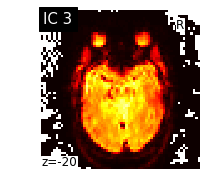

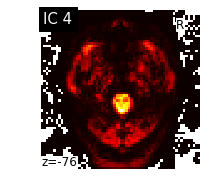

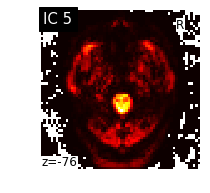

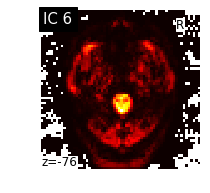

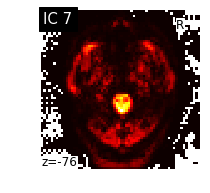

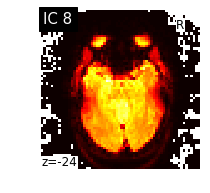

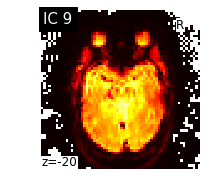

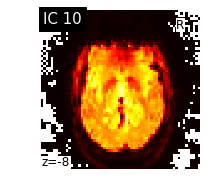

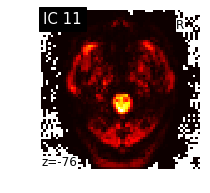

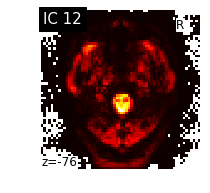

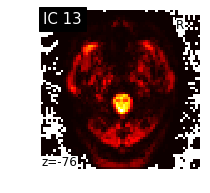

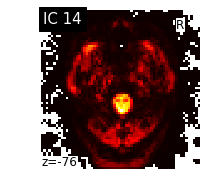

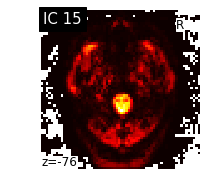

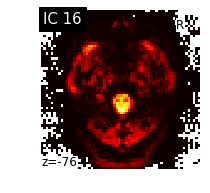

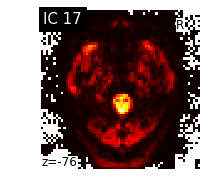

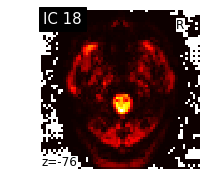

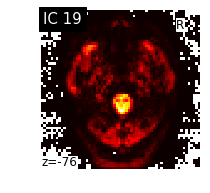

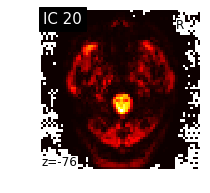

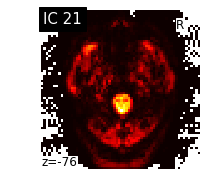

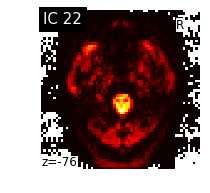

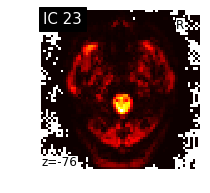

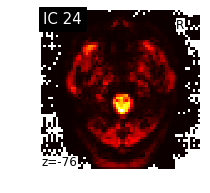

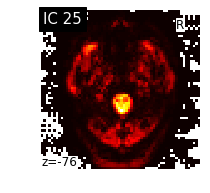

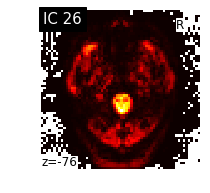

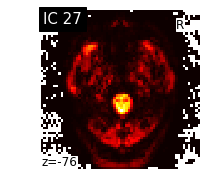

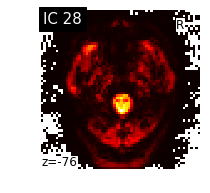

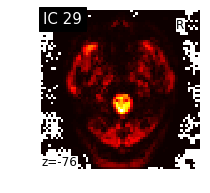

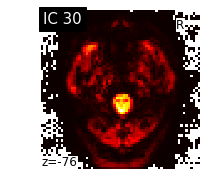

In [ ]:
raw = load_img('/home/share/TmpData/yu/trace_Autism_new/AUTISM_DATA/ABIDE_II/ABIDEII-BNI_1/29006/session_1/rest_1/rest.nii.gz')

from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show

for i, cur_img in enumerate(iter_img(raw)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=1, colorbar=False)
    show()
